# Проект: классификация

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [59]:
df = pd.read_csv('bank_fin.csv', sep = ';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


In [60]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
# ваш код
bank = df.isnull().sum()
nulls = bank[bank > 0]
print('Признаки и количество пропущенных значений:\n{}'.format(nulls))

Признаки и количество пропущенных значений:
balance    25
dtype: int64


In [61]:
df.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance      25
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

In [62]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
# ваш код
df['job'].unique()




array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [63]:
df.value_counts()


age  job         marital   education  default  balance        housing  loan  contact    day  month  duration  campaign  pdays  previous  poutcome  deposit
18   student     single    primary    no        608,00 $      no       no    cellular   12   aug    267       1         -1     0         unknown   yes        1
45   management  single    tertiary   no        4 831,00 $    no       no    cellular   30   jul    852       3          182   11        success   yes        1
                 married   tertiary   yes      -577,00 $      yes      yes   cellular   24   jul    204       1         -1     0         unknown   no         1
                           unknown    no        2 724,00 $    no       no    cellular   28   jun    359       2          182   1         success   yes        1
                                                9 051,00 $    yes      no    unknown    19   may    124       63        -1     0         unknown   no         1
                                             

## слово, которым закодированы пропуски (неизвестные значения). - unknown

### Задание 3

In [64]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
def balance2float(x):
    if x is np.NaN:
        return np.NaN
    elif str(x)[0] == '0':
        return 0
    else:
        return int(str(x)[:-6].replace(' ', ''))


df['balance'] = df['balance'].apply(balance2float)


## Задание 2.3

## Вычислите среднее значение по преобразованному в корректный вид признаку balance. Ответ округлите до трёх знаков после точки-разделителя.

In [65]:
df['balance'].mean()

1529.1290293615875

### Задание 4

In [66]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
# ваш код
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку

median_balance = df['balance'].median()
df['balance'].fillna(median_balance, inplace=True)





## Вычислите среднее значение по преобразованному в корректный вид признаку balance. Ответ округлите до трёх знаков после точки-разделителя.

In [67]:
df['balance'].mean()

1526.9360329690019

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  int64  
 1   job        11162 non-null  object 
 2   marital    11162 non-null  object 
 3   education  11162 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  float64
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


### Задание 5

In [69]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
# ваш код
df['job'] = df['job'].replace('unknown', df['job'].mode()[0])
df['education'] = df['education'].replace('unknown', df['education'].mode()[0])
df_new = df[(df['job'] == 'management') & (df['education'] == 'secondary')]


## После замены пропусков рассчитайте средний баланс для клиентов с самой популярной работой и самым популярным уровнем образования (т. е. для тех, у кого одновременно самая популярная работа и самое популярное образование). Ответ округлите до трёх знаков после точки-разделителя.

In [70]:
round(df['balance'].mean(),3)

1526.936

### Задание 6

In [71]:
# удалите все выбросы для признака balance
# ваш код
def drop_iqr(df, col, left=1.5, right=1.5, log_scale=False, add_one=False):
       if log_scale and add_one:
        x = np.log(df[col]+1)
       elif log_scale and not add_one:
        x = np.log(df[col])
       else:
        x = df[col]
    
       quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
       iqr = quartile_3 - quartile_1
       lower_bound = quartile_1 - (iqr*left)
       upper_bound = quartile_3 + (iqr*right)
       outliers = df[(x<lower_bound) | (x>upper_bound)]
       clean_df = df[(x>=lower_bound) & (x<=upper_bound)]
    
       return clean_df, lower_bound, upper_bound, outliers


df, lower_bound, upper_bound, _ = drop_iqr(df, 'balance')
print(lower_bound, upper_bound, df.shape[0])


-2241.0 4063.0 10105


## Часть 2:  Разведывательный анализ

### Задание 1

### Сколько клиентов открыли депозит?

no     5424
yes    4681
Name: deposit, dtype: int64

no     0.536764
yes    0.463236
Name: deposit, dtype: float64

Text(0.5, 1.0, 'Class balance\n')

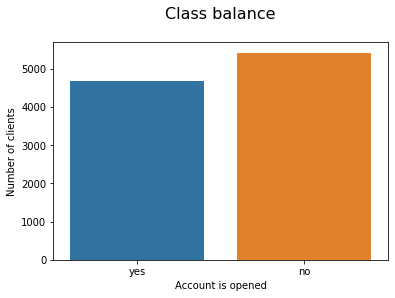

In [72]:
display(df['deposit'].value_counts())
display(df['deposit'].value_counts(normalize=True))

ax = sns.countplot(df['deposit'])
ax.set(xlabel='Account is opened', ylabel='Number of clients')
ax.set_title('Class balance\n',fontsize=16)

## Каков максимальный возраст клиента банка?

In [73]:
df['age'].max()


95

# Какова минимальная продолжительность разговора с клиентом банка? Ответ дайте в количестве секунд..

In [74]:
df["duration"].min()

2

## Сколько было месяцев, в которых проводилась маркетинговая кампания?

,age,balance,day,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230
std,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000
max,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


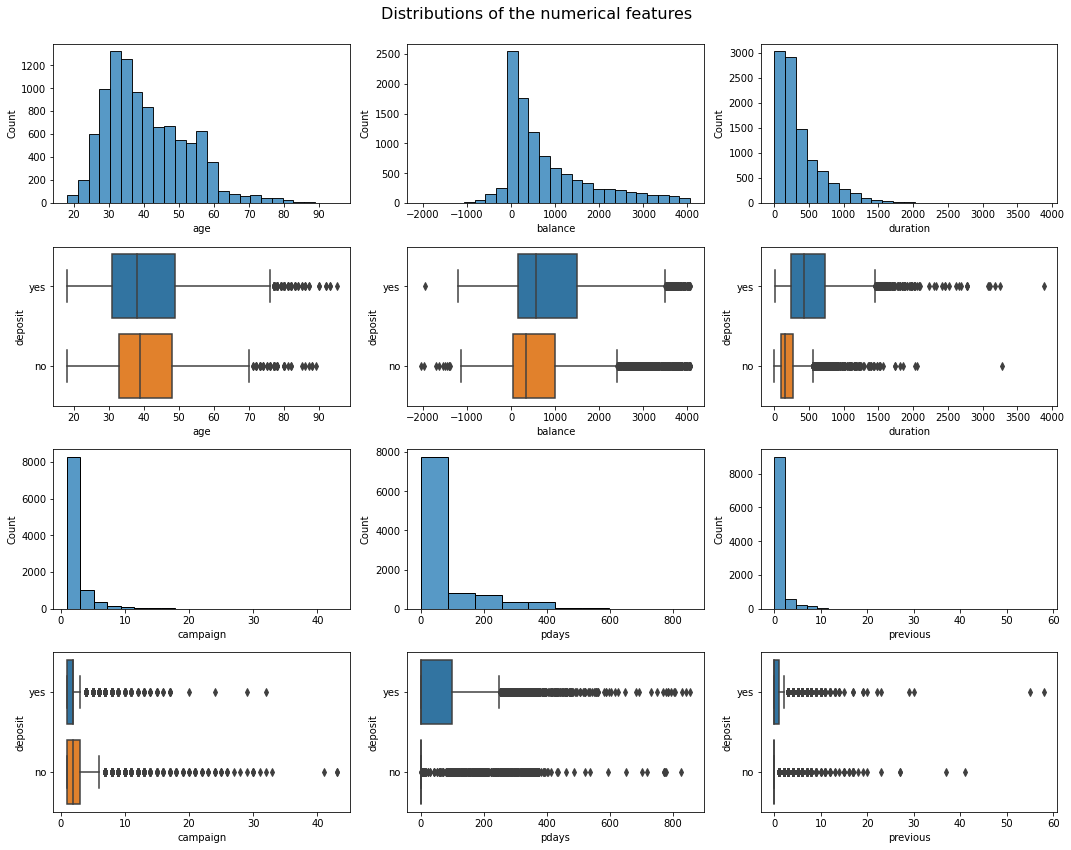

In [75]:
display(df.describe())

fig, ax = plt.subplots(4,3, figsize=(15,12))
sns.histplot(df['age'], bins=25, ax=ax[0,0])       
sns.histplot(df['balance'], bins=25, ax=ax[0,1])  
sns.histplot(df['duration'], bins=25, ax=ax[0,2])  
sns.boxplot(data=df, x='age', y='deposit', ax=ax[1,0]) 
sns.boxplot(data=df, x='balance', y='deposit', ax=ax[1,1])
sns.boxplot(data=df, x='duration', y='deposit', ax=ax[1,2])
sns.histplot(df['campaign'], bins=20, ax=ax[2,0])  
sns.histplot(df['pdays'], bins=10, ax=ax[2,1])     
sns.histplot(df['previous'], bins=25, ax=ax[2,2])  
sns.boxplot(data=df, x='campaign', y='deposit', ax=ax[3,0])
sns.boxplot(data=df, x='pdays', y='deposit', ax=ax[3,1])
sns.boxplot(data=df, x='previous', y='deposit', ax=ax[3,2])
plt.suptitle('Distributions of the numerical features\n', fontsize=16)
plt.tight_layout()

### Задание 2

In [76]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
# ваш код

### Задания 2 и 3

In [77]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
#ваш код

### Задания 4 и 5

In [78]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
#ваш код
#постройте визуализации, иллюстрирующие результаты

### Задание 6

In [79]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
# ваш код

### Задание 7

In [80]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
# ваш код

### Задание 8

In [81]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения

### Задания 9 и 10

In [82]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса

In [83]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования

In [84]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости

### Задание 11

In [85]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)

## Часть 3: преобразование данных

### Задание 1

In [86]:
# преобразуйте уровни образования

### Задания 2 и 3

In [87]:
# преобразуйте бинарные переменные в представление из нулей и единиц

### Задание 4

In [88]:
# создайте дамми-переменные

### Задания 5 и 6

In [89]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности

### Задания 7 и 8

In [90]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [91]:
# рассчитайте необходимые показатели

### Задание 9

In [92]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков

### Задание 10

In [93]:
# нормализуйте данные с помощью minmaxsxaler

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [94]:
# обучите логистическую регрессию и рассчитайте метрики качества

### Задания 2,3,4

In [95]:
# обучите решающие деревья, настройте максимальную глубину

### Задание 5

In [96]:
# подберите оптимальные параметры с помощью gridsearch

# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [97]:
# обучите на ваших данных случайный лес

### Задания 2 и 3

In [98]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом

### Задание 4

In [99]:
# объедините уже известные вам алгоритмы с помощью стекинга 

### Задание 5

In [100]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга

### Задания 6,7,8

In [101]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna